In [10]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge

In [11]:
train_df = pd.read_csv("D:\\Ameng\\Data Science Project\\house-prices-prediction\\data\\raw\\train.csv")
test_df = pd.read_csv("D:\\Ameng\\Data Science Project\\house-prices-prediction\\data\\raw\\test.csv")

In [12]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
train_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [14]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [15]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

## Checking For Outliers

Check all of the features to see is there any outliers or not based on SalePrice using scatter plot.

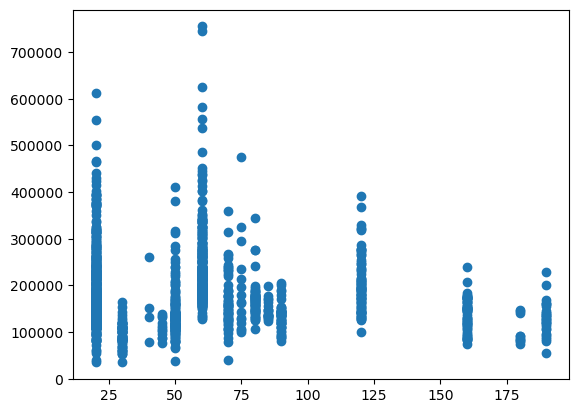

In [16]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)

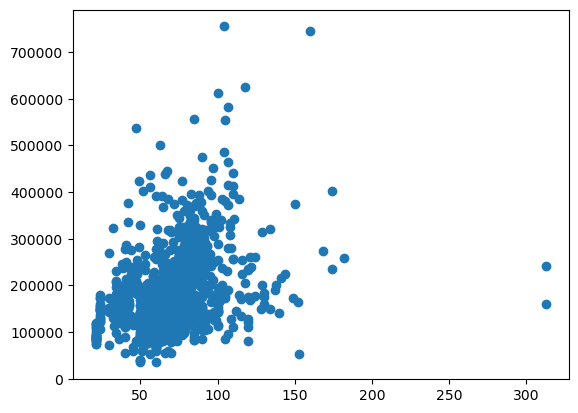

In [17]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

There are positive trend associated with x-axis, but there are some value that way out on the right of the graph

In [18]:
train_df.query('LotFrontage > 300')
# Drop 935, 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
934    935          20       RL        313.0    27650   Pave   NaN      IR2   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
934          HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
934      11   2008        WD         Normal     242000  
1298      1   2008       New        Partial     160000  

[2 rows x 81 columns]

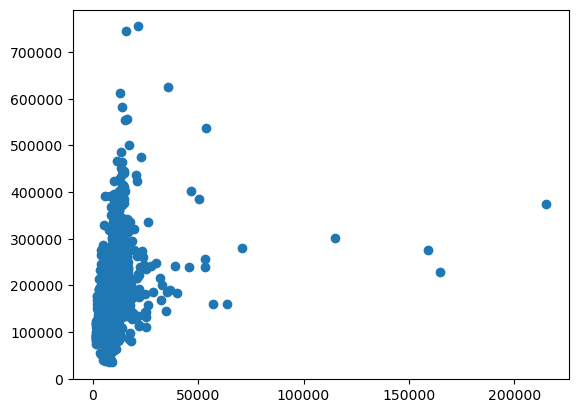

In [19]:
plt.scatter(x='LotArea', y='SalePrice', data=train_df)

The plot area is pretty small, but there are some value that way out from the plot area around more than 55000.

In [20]:
train_df.query('LotArea > 55000')
# 250, 314, 336, 707
# probably 1397

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
313    314          20       RL        150.0   215245   Pave   NaN      IR3   
335    336         190       RL          NaN   164660   Grvl   NaN      IR1   
451    452          20       RL         62.0    70761   Pave   NaN      IR1   
706    707          20       RL          NaN   115149   Pave   NaN      IR2   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1396  1397          20       RL          NaN    57200   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
249          Low    AllPub  ...        0    NaN   NaN        Shed     500   
313          Low    AllPub  ...        0    NaN   NaN         NaN       0   
335          HLS    AllPub  ...        0    NaN   NaN        Shed     700   
451          Low    AllPub  ...        0    NaN   NaN         NaN       0   
706          Low    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   
1396         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
249       6   2007        WD         Normal     277000  
313       6   2009        WD         Normal     375000  
335       8   2008        WD         Normal     228950  
451      12   2006        WD         Normal     280000  
706       6   2007        WD         Normal     302000  
1298      1   2008       New        Partial     160000  
1396      6   2010        WD         Normal     160000  

[7 rows x 81 columns]

In [21]:
pd.Series(stats.zscore(train_df['LotArea'])).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
dtype: float64

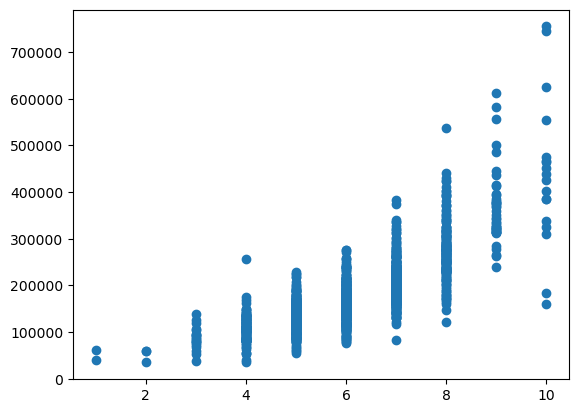

In [22]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)

In [23]:
train_df.query('OverallQual == 10')
# maybe 524

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
58      59          60       RL         66.0    13682   Pave   NaN      IR2   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
224    225          20       RL        103.0    13472   Pave   NaN      Reg   
389    390          60       RL         96.0    12474   Pave   NaN      Reg   
440    441          20       RL        105.0    15431   Pave   NaN      Reg   
515    516          20       RL         94.0    12220   Pave   NaN      Reg   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
583    584          75       RM         75.0    13500   Pave   NaN      Reg   
591    592          60       RL         97.0    13478   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
825    826          20       RL        114.0    14803   Pave   NaN      Reg   
994    995          20       RL         96.0    12456   Pave   NaN      Reg   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1373  1374          20       RL          NaN    11400   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
58           HLS    AllPub  ...        0    NaN    NaN         NaN       0   
185          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
224          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
389          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
440          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
515          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
523          Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
583          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
591          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
825          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
994          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1243         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd    NaN         NaN       0   
1373         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1442         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
58       10   2006       New        Partial     438780  
185       6   2006        WD         Normal     475000  
224       6   2009        WD         Normal     386250  
389       8   2008       New        Partial     426000  
440       4   2009        WD         Normal     555000  
515       9   2009       New        Partial     402861  
523      10   2007       New        Partial     184750  
583       7   2008        WD         Normal     325000  
591       6   2009     ConLI         Normal     451950  
691       1   2007        WD         Normal     755000  
825       6   2008       New        Partial     385000  
994       7   2009        WD         Normal     337500  
1169      7   2006        WD         Normal     625000  
1182      7   2007        WD        Abnorml     745000  
1243      9   2006       New        Partial     465000  
1298      1   2008       New        Partial     160000  
1373      3   2007        WD         Normal     466500

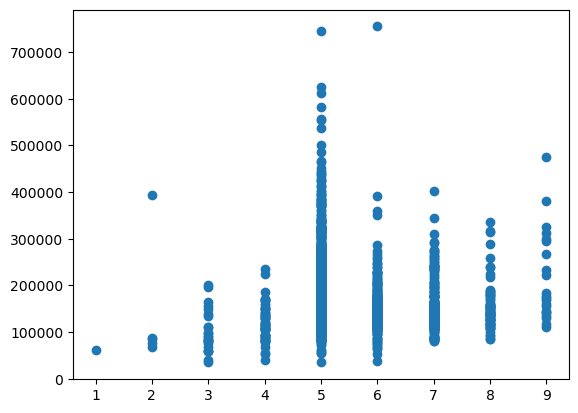

In [24]:
plt.scatter(x='OverallCond', y='SalePrice', data=train_df)

In the OverallCond 2, 5, and 6 there are some value that way too high.

In [25]:
train_df.query('OverallCond == 2')
# 379

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
88    89          50  C (all)        105.0     8470   Pave   NaN      IR1   
250  251          30       RL         55.0     5350   Pave   NaN      IR1   
378  379          20       RL         88.0    11394   Pave   NaN      Reg   
398  399          30       RM         60.0     8967   Pave   NaN      Reg   
676  677          70       RM         60.0     9600   Pave  Grvl      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
88          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
250         Lvl    AllPub  ...        0    NaN   GdWo        Shed     450   
378         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
398         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
676         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
88      10   2009     ConLD        Abnorml      85000  
250      5   2010        WD         Normal      76500  
378      6   2010       New        Partial     394432  
398     11   2007        WD        Abnorml      67000  
676      5   2006        WD         Normal      87000  

[5 rows x 81 columns]

In [26]:
train_df.query('OverallCond == 5 & SalePrice > 700000')
# 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1182      7   2007        WD        Abnorml     745000  

[1 rows x 81 columns]

In [27]:
train_df.query('OverallCond == 6 & SalePrice > 700000')
# 692

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  692          60       RL        104.0    21535   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
691         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
691      1   2007        WD         Normal     755000  

[1 rows x 81 columns]

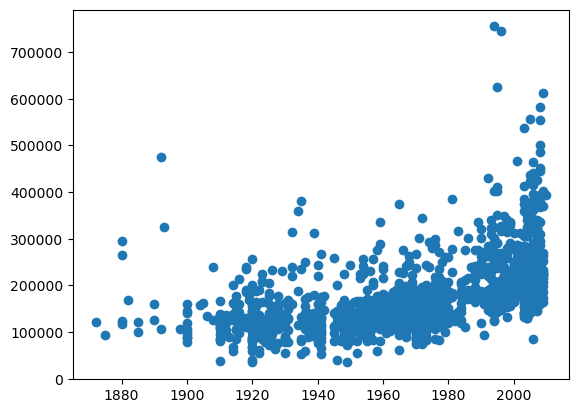

In [28]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)

In [29]:
train_df.query('YearBuilt < 1900 & SalePrice > 400000')
# 186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185  186          75       RM         90.0    22950   Pave   NaN      IR2   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
185         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
185      6   2006        WD         Normal     475000  

[1 rows x 81 columns]

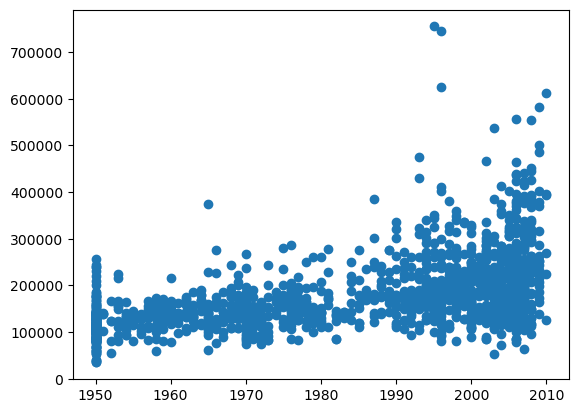

In [30]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)

In [31]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')
# 314

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
313  314          20       RL        150.0   215245   Pave   NaN      IR3   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
313         Low    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
313      6   2009        WD         Normal     375000  

[1 rows x 81 columns]

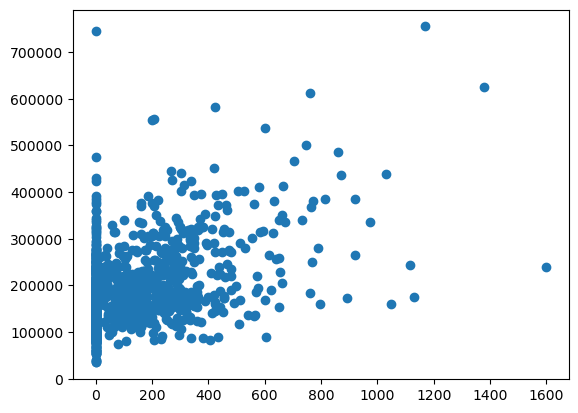

In [32]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

In [33]:
train_df.query('MasVnrArea > 1300')
# 298, 1170

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
297    298          60       FV         66.0     7399   Pave  Pave      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
297          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1169         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
297       6   2007        WD         Normal     239000  
1169      7   2006        WD         Normal     625000  

[2 rows x 81 columns]

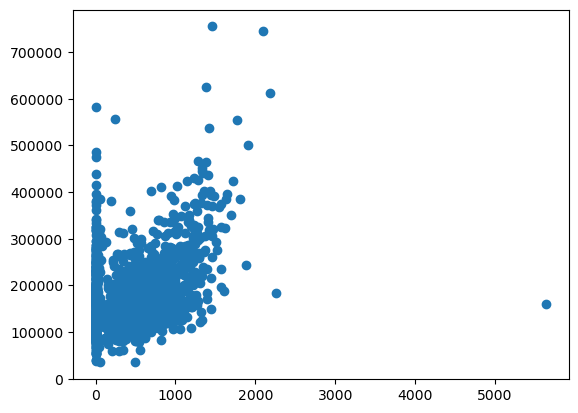

In [34]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)

In [35]:
train_df.query('BsmtFinSF1 > 5000')
# 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]

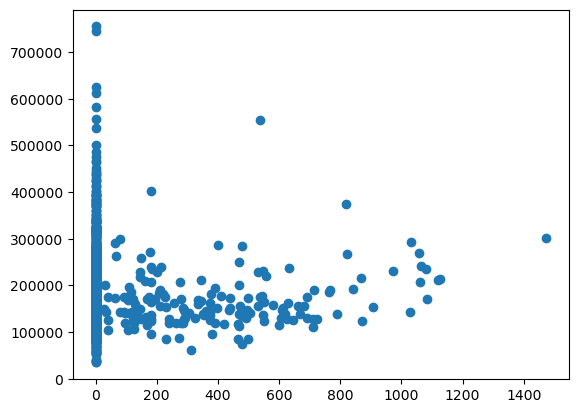

In [36]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_df)

In [37]:
train_df.query('BsmtFinSF2 > 400 & SalePrice > 500000')
# 441

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
440  441          20       RL        105.0    15431   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
440         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
440      4   2009        WD         Normal     555000  

[1 rows x 81 columns]

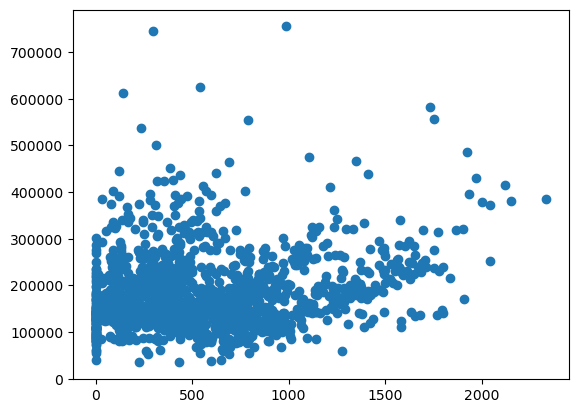

In [38]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train_df)

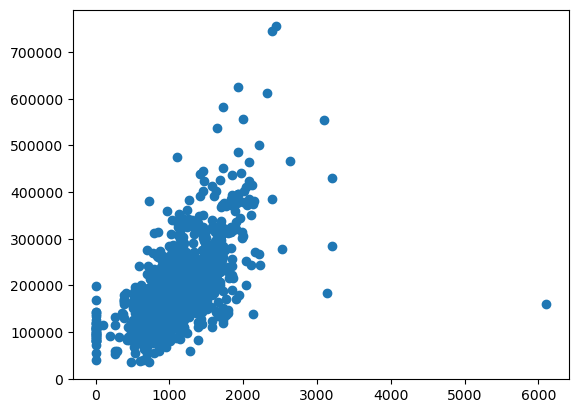

In [39]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)

In [40]:
train_df.query('TotalBsmtSF > 5000')
# 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  

[1 rows x 81 columns]

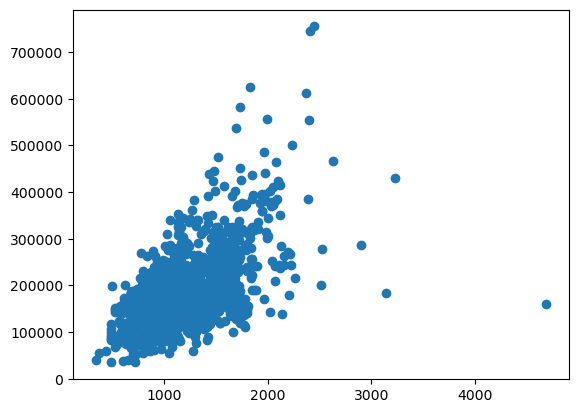

In [41]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=train_df)

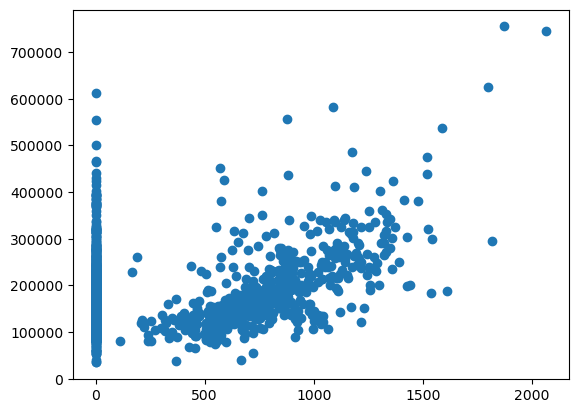

In [42]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)

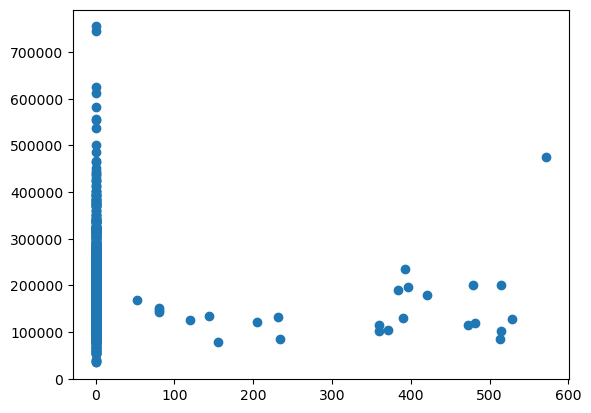

In [43]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_df)

In [44]:
train_df.query('LowQualFinSF > 550')
# 186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185  186          75       RM         90.0    22950   Pave   NaN      IR2   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
185         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
185      6   2006        WD         Normal     475000  

[1 rows x 81 columns]

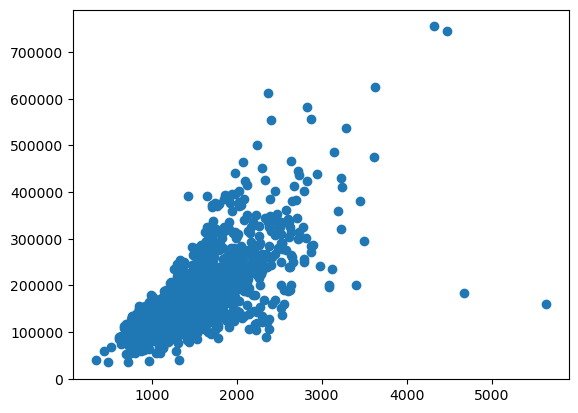

In [45]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)

In [46]:
train_df.query('GrLivArea > 4000 & SalePrice < 400000')
# 524, 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
523          Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
523      10   2007       New        Partial     184750  
1298      1   2008       New        Partial     160000  

[2 rows x 81 columns]

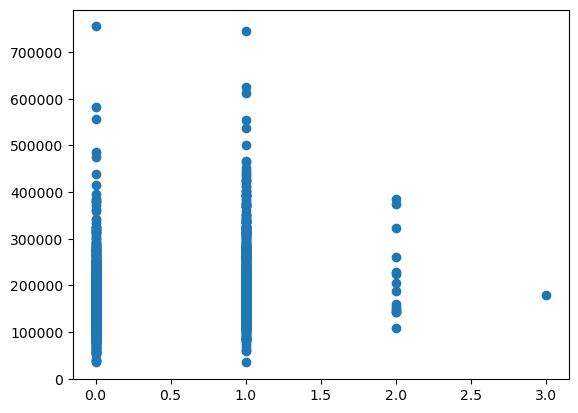

In [47]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)

In [48]:
train_df.query('BsmtFullBath == 3')
# 739

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
738  739          90       RL         60.0    10800   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
738         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
738      3   2009        WD         Alloca     179000  

[1 rows x 81 columns]

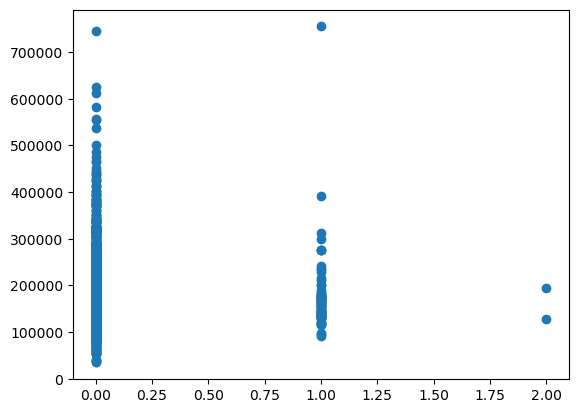

In [49]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)

In [50]:
pd.Series(stats.zscore(train_df['BsmtHalfBath'])).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [51]:
train_df.query('BsmtHalfBath == 2')
# 598, 955

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
597  598         120       RL         53.0     3922   Pave   NaN      Reg   
954  955          90       RL         35.0     9400   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
597         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
954         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
597      2   2007       New        Partial     194201  
954     10   2006        WD        AdjLand     127500  

[2 rows x 81 columns]

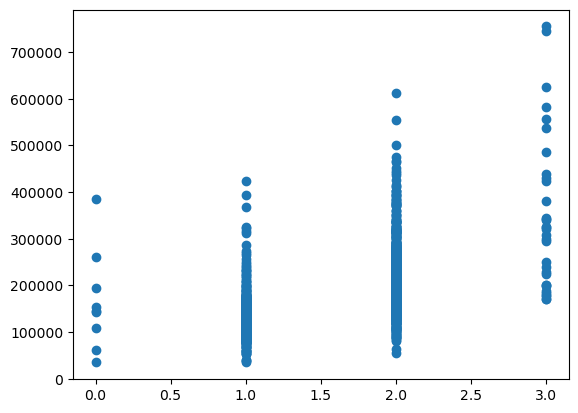

In [52]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)

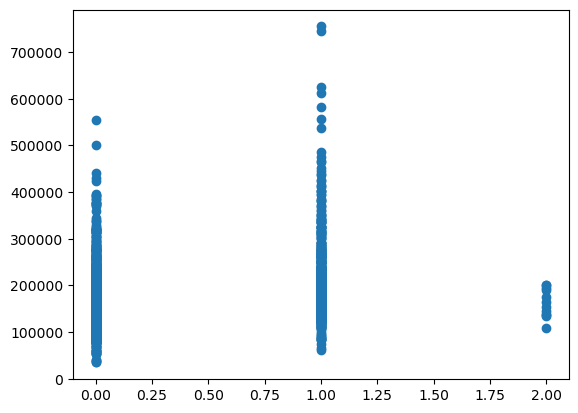

In [53]:
plt.scatter(x='HalfBath', y='SalePrice', data=train_df)

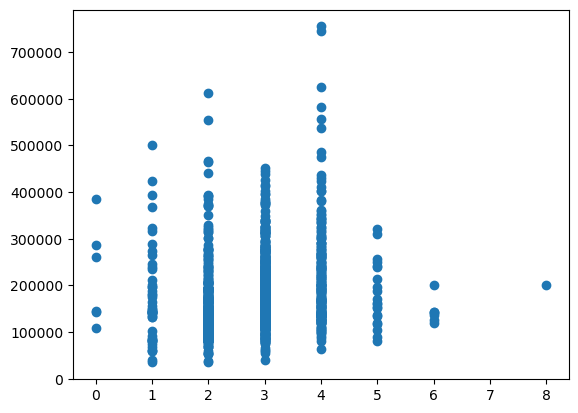

In [54]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)

In [55]:
train_df.query('BedroomAbvGr == 8')
# 636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
635  636         190       RH         60.0    10896   Pave  Pave      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
635         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
635      3   2007        WD        Abnorml     200000  

[1 rows x 81 columns]

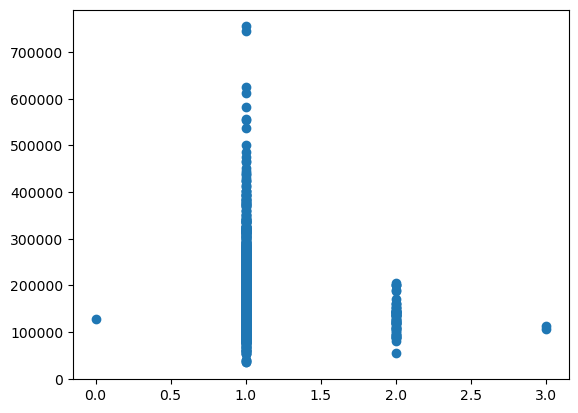

In [56]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train_df)

In [57]:
train_df.query('KitchenAbvGr == 3')
# 49, 810

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48    49         190       RM         33.0     4456   Pave   NaN      Reg   
809  810          75       RM         90.0     8100   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
48          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
809         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
48       6   2009       New        Partial     113000  
809     11   2009        WD         Normal     106000  

[2 rows x 81 columns]

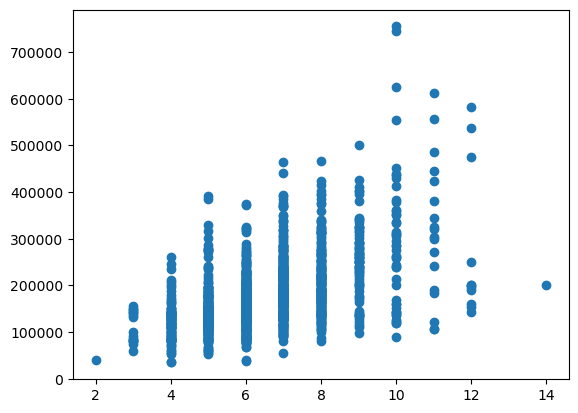

In [58]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

In [59]:
train_df.query('TotRmsAbvGrd == 14')
# 636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
635  636         190       RH         60.0    10896   Pave  Pave      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
635         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
635      3   2007        WD        Abnorml     200000  

[1 rows x 81 columns]

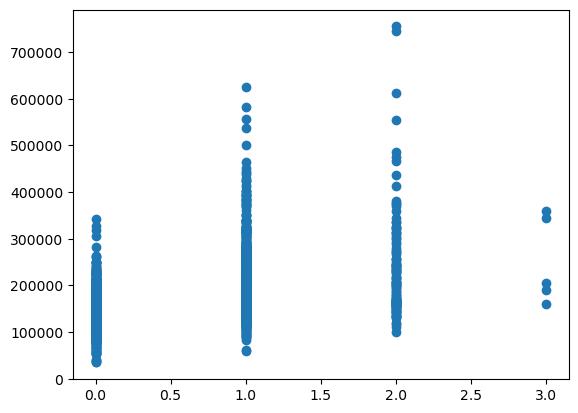

In [60]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)

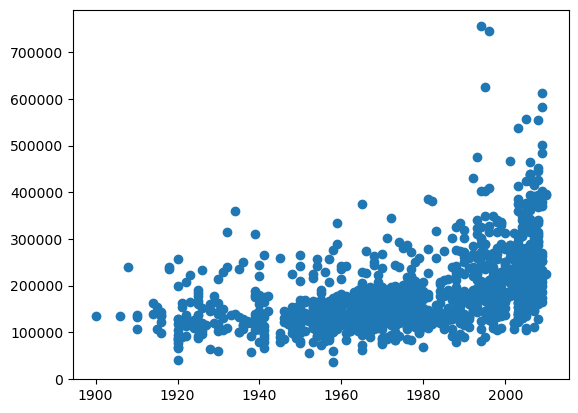

In [61]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_df)

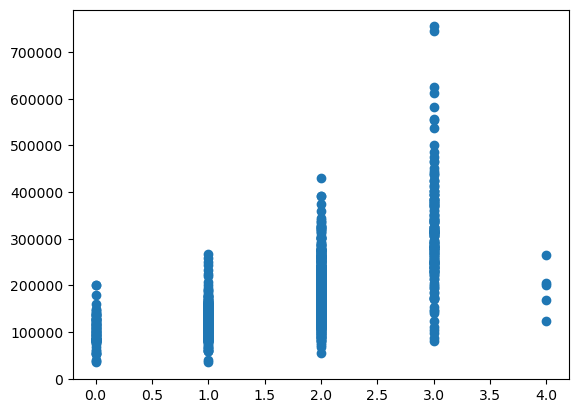

In [62]:
plt.scatter(x='GarageCars', y='SalePrice', data=train_df)

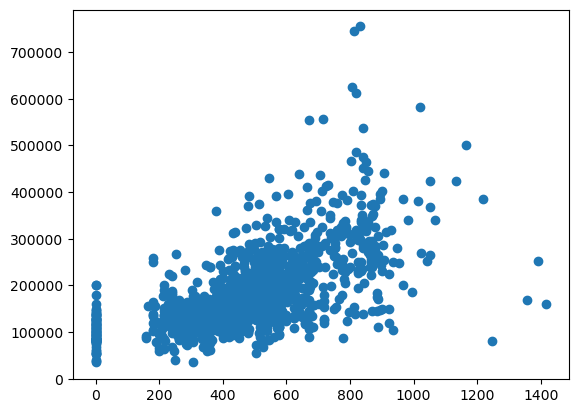

In [63]:
plt.scatter(x='GarageArea', y='SalePrice', data=train_df)

In [64]:
train_df.query('GarageArea > 1200 & SalePrice < 300000')
# 582, 1062, 1191, 1299


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
581    582          20       RL         98.0    12704   Pave   NaN      Reg   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
581          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1061         Low    AllPub  ...        0    NaN   NaN        Shed     560   
1190         Low    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
581       8   2009       New        Partial     253293  
1061      8   2008     ConLD         Normal      81000  
1190      3   2007        WD         Normal     168000  
1298      1   2008       New        Partial     160000  

[4 rows x 81 columns]

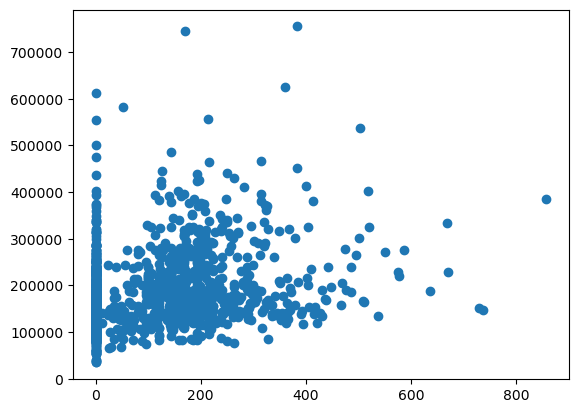

In [65]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=train_df)

In [66]:
train_df.query('WoodDeckSF > 800')
# 54

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53  54          20       RL         68.0    50271   Pave   NaN      IR1   

   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
53         Low    AllPub  ...        0    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
53     11   2006        WD         Normal     385000  

[1 rows x 81 columns]

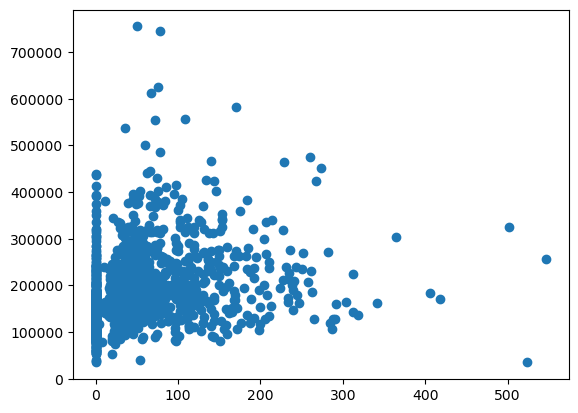

In [67]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=train_df)

In [68]:
train_df.query('OpenPorchSF > 450')
# 496

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
495    496          30  C (all)         60.0     7879   Pave   NaN      Reg   
583    584          75       RM         75.0    13500   Pave   NaN      Reg   
1328  1329          50       RM         60.0    10440   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
495          Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
583          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1328         Lvl    AllPub  ...        0    NaN  MnPrv        Shed    1150   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
495      11   2009        WD        Abnorml      34900  
583       7   2008        WD         Normal     325000  
1328      6   2008        WD         Normal     256000  

[3 rows x 81 columns]

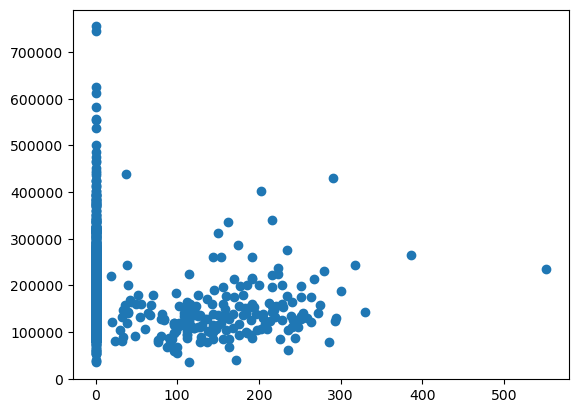

In [69]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=train_df)

In [70]:
train_df.query('EnclosedPorch > 500')
# 198

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197  198          75       RL        174.0    25419   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
197         Lvl    AllPub  ...      512     Ex  GdPrv         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
197      3   2006        WD        Abnorml     235000  

[1 rows x 81 columns]

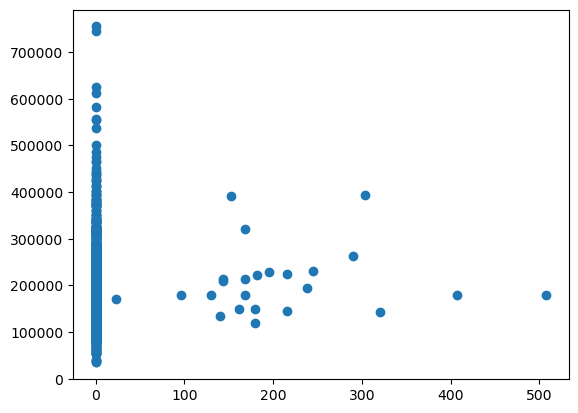

In [71]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=train_df)

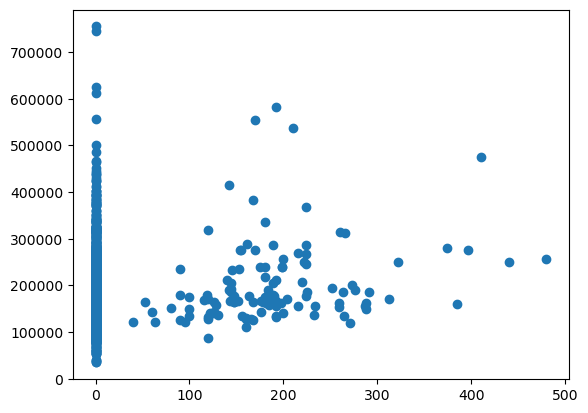

In [72]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=train_df)

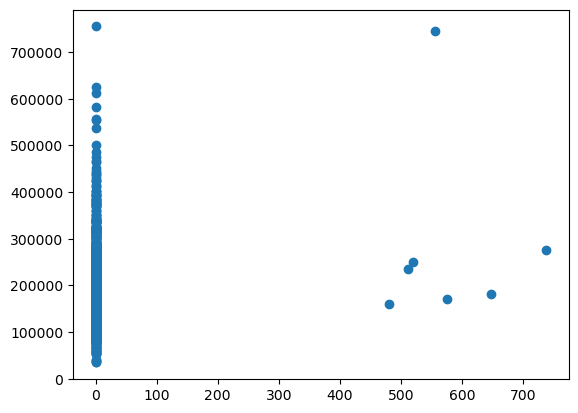

In [73]:
plt.scatter(x='PoolArea', y='SalePrice', data=train_df)

In [74]:
values = [198, 496, 54, 582, 1062, 1191, 1299, 250, 336, 707, 524, 379, 1183, 692, 186, 314, 298, 1170, 441, 739, 598, 955, 636, 49, 810]

In [75]:
# Drop all of the Id in values
train_df = train_df[train_df.Id.isin(values) == False]
test_df = test_df[test_df.Id.isin(values) == False]

## Checking Missing Values

In [76]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

0
PoolQC        1431
MiscFeature   1384
Alley         1346
Fence         1159
MasVnrType     860
FireplaceQu    683
LotFrontage    255
GarageYrBlt     76
GarageCond      76
GarageType      76
GarageFinish    76
GarageQual      76
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
Electrical       1
Id               0

### Checking 'MasVnrType' missing values

In [77]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [78]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('No')
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\1195943069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['MasVnrType'] = train_df['MasVnrType'].fillna('No')


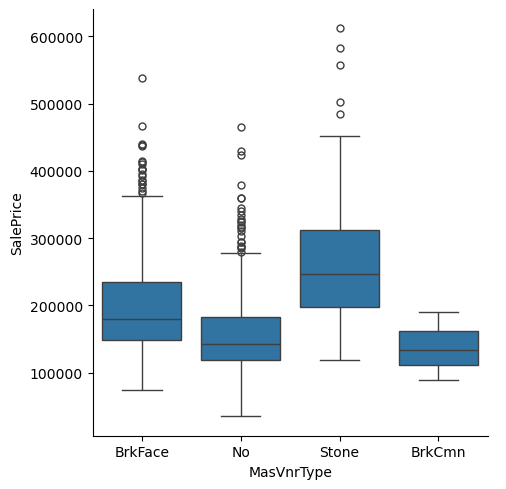

In [79]:
sns.catplot(data=train_df, x='MasVnrType', y='SalePrice', kind='box')

In [80]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\2595227294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)


### Checking 'FireplaceQu' missing values

In [81]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [82]:
train_df['FireplaceQu'].value_counts()

FireplaceQu
Gd    372
TA    306
Fa     33
Ex     21
Po     20
Name: count, dtype: int64

In [83]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('No')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\492290614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('No')


In [84]:
train_df['FireplaceQu'].isnull().sum()

np.int64(0)

### Checking 'LotFrontage' missing values

In [85]:
train_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,  83.,
        43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38., 109.,
       130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114., 128.,
       149., 313., 168., 182., 138., 152., 124., 153.,  46.])

In [86]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(0)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(0)

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\984480718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['LotFrontage'] = train_df['LotFrontage'].fillna(0)


### Checking 'GarageFinish' missing values

In [87]:
train_df['GarageFinish'] = train_df['GarageFinish'].fillna('No')
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\4274983210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageFinish'] = train_df['GarageFinish'].fillna('No')


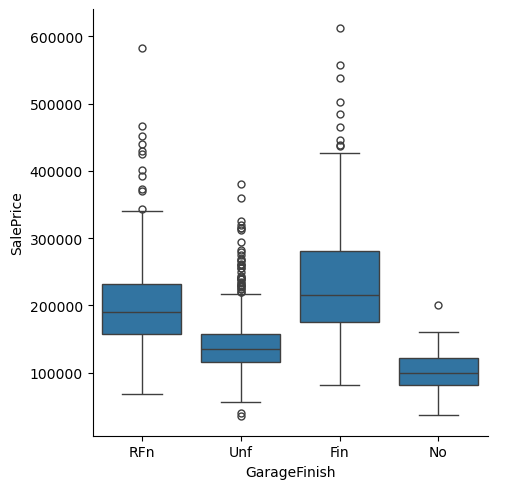

In [88]:
sns.catplot(data=train_df, x='GarageFinish', y='SalePrice', kind='box')

### Checking 'GarageYrBlt' missing values

In [89]:
train_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1964., 1999., 1935., 1990., 1945., 1987., 1989., 1915.,
       1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900., 1979.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1981., 1986., 1988., 1916., 1932., 1972., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       1927., 1918., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 2010., 1946., 1908., 1929., 1933.])

In [90]:
train_df['GarageYrBlt'].corr(train_df['SalePrice'])

np.float64(0.5118592360495409)

In [91]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

np.float64(0.827794570869321)

The correlation between 'GarageYrBlt' and 'SalePrice' is not too high. Otherwise, the correlation to 'YearBuilt' close to 1 which means the year the house was built, the garage was also built in the same year. So, maybe we can drop the 'GarageYrBlt' column.

### Checking 'GarageQual' missing values

In [92]:
train_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [93]:
train_df['GarageQual'] = train_df['GarageQual'].fillna('No')
test_df['GarageQual'] = test_df['GarageQual'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\2875319013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageQual'] = train_df['GarageQual'].fillna('No')


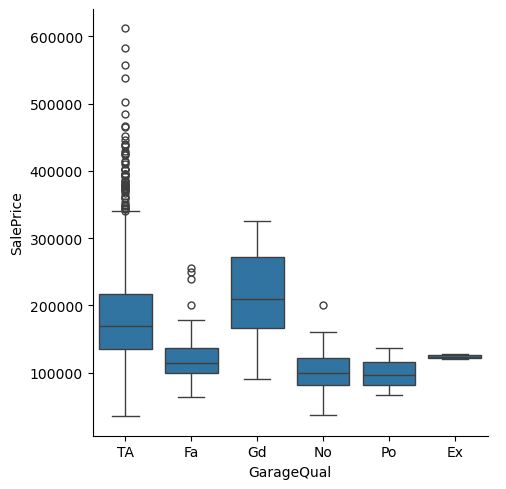

In [94]:
sns.catplot(data=train_df, x='GarageQual', y='SalePrice', kind='box')

### Checking 'GarageType' missing values

In [95]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [96]:
train_df['GarageType'] = train_df['GarageType'].fillna('No')
test_df['GarageType'] = test_df['GarageType'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\3164207293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageType'] = train_df['GarageType'].fillna('No')


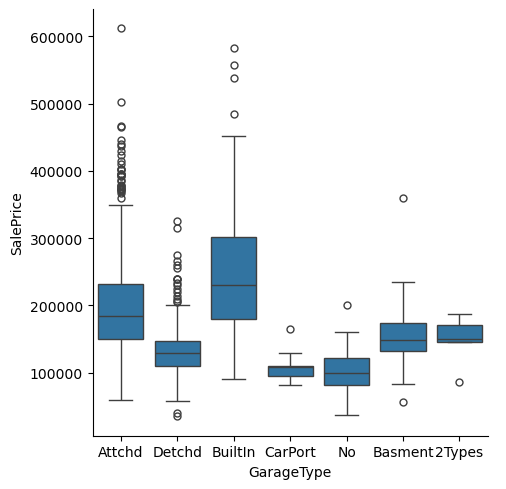

In [97]:
sns.catplot(data=train_df, x='GarageType', y='SalePrice', kind='box')

### Checking 'GarageCond' missing values

In [98]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [99]:
train_df['GarageCond'] = train_df['GarageCond'].fillna('No')
test_df['GarageCond'] = test_df['GarageCond'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\2645791409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageCond'] = train_df['GarageCond'].fillna('No')


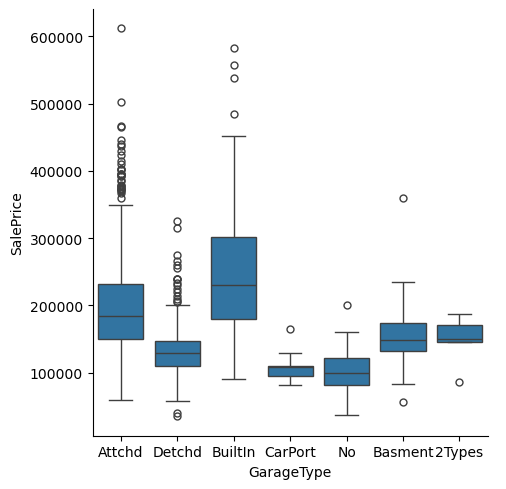

In [100]:
sns.catplot(data=train_df, x='GarageType', y='SalePrice', kind='box')

### Checking 'BsmtFinType2' missing values

In [101]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [102]:
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('No')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\1781161378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('No')


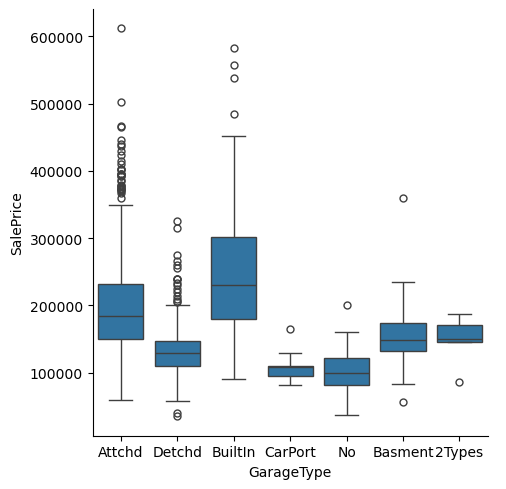

In [103]:
sns.catplot(data=train_df, x='GarageType', y='SalePrice', kind='box')

### Checking 'BsmtExposure' missing values

In [104]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [105]:
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('Nb')
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna('Nb')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\607277441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('Nb')


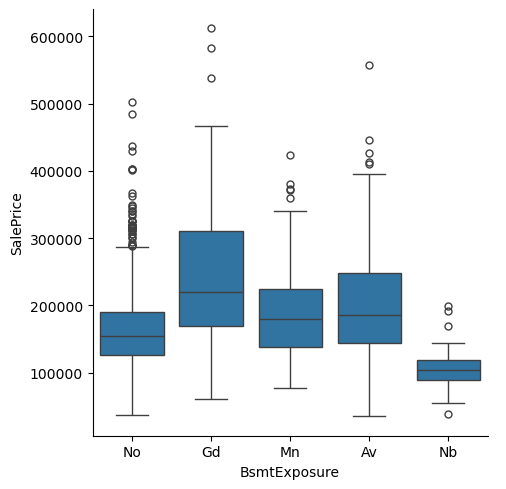

In [106]:
sns.catplot(data=train_df, x='BsmtExposure', y='SalePrice', kind='box')

### Checking 'BsmtQual' missing values

In [107]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [108]:
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('No')
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\3176691201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtQual'] = train_df['BsmtQual'].fillna('No')


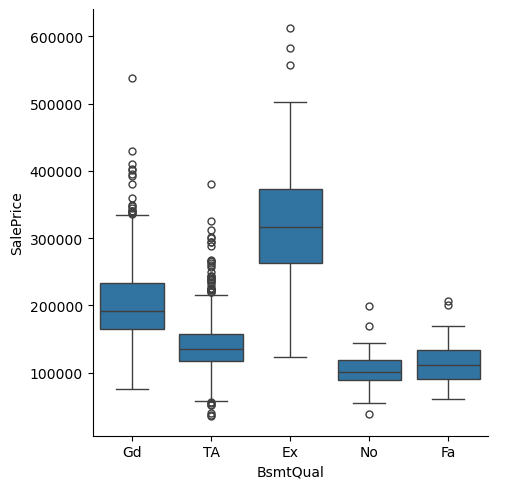

In [109]:
sns.catplot(data=train_df, x='BsmtQual', y='SalePrice', kind='box')

### Checking 'BsmtCond' missing values

In [110]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [111]:
train_df['BsmtCond'] = train_df['BsmtCond'].fillna('No')
test_df['BsmtCond'] = test_df['BsmtCond'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\739457422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtCond'] = train_df['BsmtCond'].fillna('No')


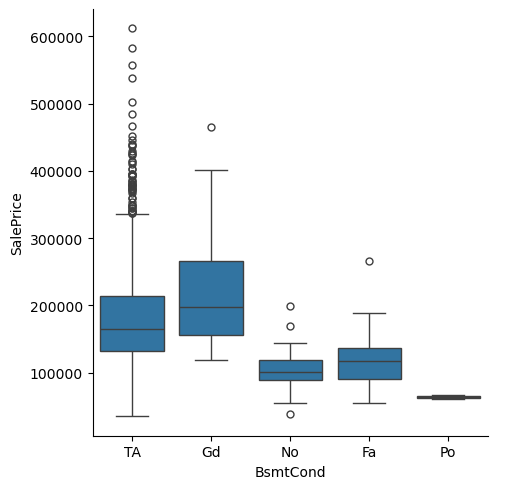

In [112]:
sns.catplot(data=train_df, x='BsmtCond', y='SalePrice', kind='box')

### Checking 'BsmtFinType1' missing values

In [113]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [114]:
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('No')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('No')

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\3978206645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('No')


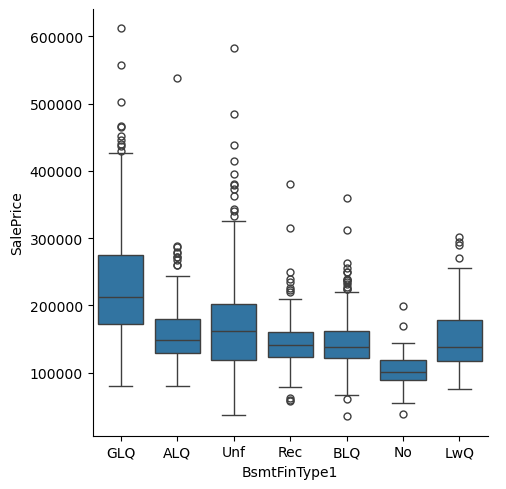

In [115]:
sns.catplot(data=train_df, x='BsmtFinType1', y='SalePrice', kind='box')

### Checking 'Electrical' missing values

In [116]:
train_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [117]:
train_df.loc[train_df['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1379         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1379      5   2008        WD         Normal     167500  

[1 rows x 81 columns]

In [118]:
train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')
test_df['Electrical'] = test_df['Electrical'].fillna('SBrkr') 

C:\Users\akmal\AppData\Local\Temp\ipykernel_19620\745097365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')


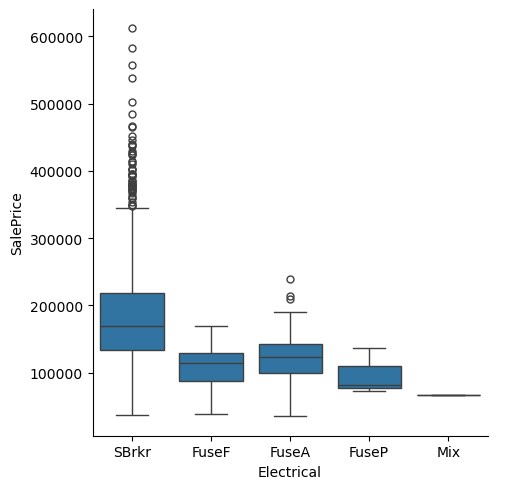

In [119]:
sns.catplot(data=train_df, x='Electrical', y='SalePrice', kind='box')

### Drop unimportant columns
Drop columns that have too many missing values ('PoolQc', 'MiscFeature', 'Alley', 'Fence') and not very useful ('GarageYrBlt', 'BsmtFinType2').

In [120]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'BsmtFinType2'])

## Export Cleaned Dataset

In [122]:
train_df.to_csv("D:\\Ameng\\Data Science Project\\house-prices-prediction\\data\\processed\\cleaned_train.csv", index=False)
test_df.to_csv("D:\\Ameng\\Data Science Project\\house-prices-prediction\\data\\processed\\cleaned_test.csv", index=False)